# Ajuste Logístico
En el año 1938 el matemático belga Pierre François Verhulst presenta la ecuación logística como descripción del crecimiento autolimitado de una población. En este Notebook se introducirá y se analizará su ajuste a datos reales.

La ecuación logística representa la variación de individuos en el tiempo.Si recogemos datos sobre la evolución de una población y queremos saber si evoluciona de forma logística, hemos de compararlos por tanto con la siguiente ecuación diferencial:

$$\frac{d n}{d t}=r n\left(1-\frac{n}{N}\right)$$

La capacidad de carga (N) da información sobre la cantidad de recursos disponibles, mientras la tasa de crecimiento (r) sobre el crecimiento inicial de la población. Resolviendo la ecuación diferencial, es decir, obteniendo el valor de la población en función del tiempo:

$$\frac{d n}{d t}=r n\left(1-\frac{n}{N}\right) \Rightarrow \frac{d n}{n\left(1-\frac{n}{N}\right)}=r d t \Rightarrow \int \frac{d n}{n\left(1-\frac{n}{N}\right)}= \int\left[\frac{1}{n}+\frac{\frac{1}{N}}{1-\frac{n}{N}}\right] d n= \int rt dt \Rightarrow$$
$$\Rightarrow \ln n+\frac{1}{N} \int \frac{d n}{1-\frac{n}{N}}=\ln n-\ln |N-n| =r t+C $$

Despejando $n$ e introduciendo la condición inicial $n(t=0) = n_{0}$:

$$\ln \left(\frac{n}{N-n}\right)=r t+C \quad \Rightarrow \quad \frac{n}{N-n}=C e^{r t} \qquad ; \qquad \frac{n_{0}}{N-n_{0}}=C e^{0}=C$$

Finalmente:

$$n(t)=\frac{N}{1+\left(\frac{N-n_{0}}{n_{0}}\right) e^{-r t}}$$

Como podemos observar, hay dependencia exponencial en $\textbf{r}$, contribución que dominará en los instantes iniciales. Cabe destacar que r toma valores porcentuales, es decir, si $\textbf{r}=0,2$, quiere decir que el crecimiento es de un 20\%; si $\textbf{r}<0$, entonces la población decrecerá.

Además, hay que destacar que hemos optado por resolver la ecuación en función de la capacidad de carga porque es más conveniente para realizar los ajustes. En la teoría este parámetro se puede considerar como la población total pero, en la práctica, puede ser un valor menor.

Pasemos entonces a analizar algunos ejemplos reales. En la teoría, esta ecuación describe perfectamente el crecimiento autolimitado de una población. Es decir, modelizaría perfectamente la evolución del número de individuos en una población de conejos que viven en una isla sin depredadores, con espacio y alimento limitados. Como este caso es irreal, intentaremos ajustar otro tipo de datos con esta función, y así poder sacar conclusiones sobre sus parámetros a partir de los resultados.

## 1. Población mundial

En primer lugar, tomamos los datos de la base ourworldindata.org sobre un estudio que ha realizado Naciones Unidas con sus predicciones sobre la evolución de la población mundial hasta 2100.

Importamos las librerías que necesitamos.

In [182]:
import numpy as np
import matplotlib.pylab as plt
import scipy.optimize as so
import pandas as pd

A continuación, cargamos el fichero de datos llamado "poblacion_mundial".

In [183]:
cdir = 'C:\\' #escribimos el directorio del archivo de datos
nombre = 'poblacionmundial.xlsx'
xls = pd.ExcelFile(cdir+nombre)

Leemos el archivo y almacenamos los datos de interés en las variables x e y. Además, destacamos el dato de población máxima, pues nos servirá para compararlo con la predicción logística.

In [184]:
data = pd.read_excel(xls, sheet_name= 'Hoja1', header= 0, nrows= 151)
maxima = pd.read_excel(xls, sheet_name= 'Hoja1', header= 0, nrows= 1 )
y = np.array(data['pob/total'],'float')
x = np.array(data['num'],'float')
total = float(maxima['pobmaxima'])

Definimos la función y los parámetros iniciales.

In [185]:
x0 = 0.23345588 #población relativa inicial
r=[]
n=[]
par1 = [1 , 100]
def fun(t,r,n):
    x = n/(1+(((n-x0)/x0)*np.exp(-r*t)))
    return x

Ajustamos los datos a la curva con la función curve_fit de la librería Scipy. Además, almacenamos el valor de los parámetros que mejor se ajustan.

In [186]:
sol , cov = so.curve_fit(fun , x , y , p0=(par1))
r = sol[0]
n = sol[1]

Reescribimos los parámetros porcentualmente y representamos gráficamente.

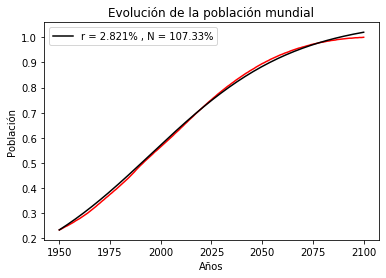

In [230]:
plt.clf()
taux=np.linspace(0 , 150 , 150)
fechas = np.arange(0,151,25)
R = r *100
N = n *100
plt.plot(x , y , 'r')
plt.plot(taux, fun(taux, r, n), 'k-' , label=f'r = {R:.3f}% , N = {N:.2f}%')
plt.xlabel('Años', fontsize=10)
plt.ylabel('Población', fontsize=10)
plt.xticks(fechas,['1950','1975','2000','2025','2050','2075','2100'],fontsize=10) #reescribimos los datos del eje horizontal para que sean años
plt.yticks(fontsize=10)
plt.legend(loc='best', fontsize=10)
plt.title('Evolución de la población mundial')
plt.grid(False)
plt.show()

In [169]:
print('La población total estimada por la base de datos es de {:.0f} personas, mientras que el crecimiento logístico predice un total de {:.0f} personas, es decir, con un error relativo del {:.2f}% '.format(total, total*n, abs(total-total*n)/total))

La población total estimada por la base de datos es de 10880000000 personas, mientras que el crecimiento logístico predice un total de 11678038868 personas, es decir, con un error relativo del 0.07% 


Como se puede observar, hay una clara tendencia ascendente a partir de los años 50. Después de la segunda guerra mundial, la calidad de vida media ascendió, de forma que la cantidad de muertes se vio muy superada por la de nacimientos. A día de hoy, este crecimiento sigue vigente, sobre todo gracias a las superpoblaciones orientales. Se estima que a mediados de siglo esto mismo sea el factor que comience a amortiguar este crecimiento, llegando a un punto estable a finales de siglo. La tendencia es claramente logística: la población asciende fruto de los recursos con los que cuenta pero se estanca, llegado el momento, por la falta de los mismos.

## 2. Urbanización

En segundo lugar, veamos si la urbanización en el siglo pasado evoluciona de forma logística.

En este segundo ejemplo hemos recogido datos sobre la variación del porcentaje de población
que vive en zonas rurales y en zonas urbanas en el país más grande del mundo: Rusia.

Cargamos el fichero de datos llamado "poblacion_urbana_rural".

In [170]:
cdir = 'C:' #directorio 
nombre = 'urban-and-rural-population.xlsx' 
xls = pd.ExcelFile(cdir+nombre)

Leemos los datos de interés y los almacenamos en las variables correspondientes.

In [171]:
datos = pd.read_excel(xls, sheet_name= 'Worksheet', header=0, nrows= 58)
año = np.array(datos['num'],'float')
rural = np.array(datos['rural media'],'float')
urbana = np.array(datos['urban media'],'float')

Definimos de nuevo la función y los parámetros iniciales.

In [172]:
x0_rural = 0.462
x0_urbana = 0.53731
r=[]
k=[]
par1 = [1 , 0.5]
def fun_rural(t,r,k):
    x = k/(1+(((k-x0_rural)/x0_rural)*np.exp(-r*t)))
    return x
def fun_urbana(t,r,k):
    x = k/(1+(((k-x0_urbana)/x0_urbana)*np.exp(-r*t)))
    return x

Ajustamos la curva y determinamos el valor de los parámetros.

In [173]:
sol_rural , cov = so.curve_fit(fun_rural , año , rural , p0=(par1))
sol_urbana , cov = so.curve_fit(fun_urbana , año , urbana , p0=(par1))

r_rural = sol_rural[0]
k_rural = sol_rural[1]
r_urbana = sol_urbana[0]
k_urbana = sol_urbana[1]
'Años', ['1963','1973','1983','1993','2003','2013']

Representamos gráficamente los resultados obtenidos. De nuevo, espresamos los parámetros de forma porcentual.

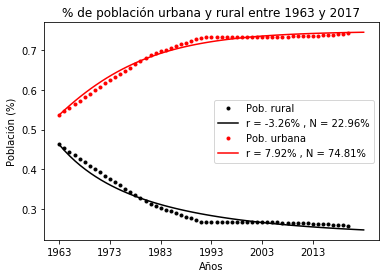

In [237]:
taux=np.linspace(0 , 60 , 59)
fechas = np.arange(0,55,10)

rporciento_urbana = r_urbana *100
kporciento_urbana = k_urbana *100
rporciento_rural = r_rural *100
kporciento_rural = k_rural *100

fig, ax = plt.subplots()
plt.plot(año , rural , 'k.' , label='Pob. rural')
plt.plot(taux, fun_rural(taux, r_rural, k_rural), 'k-', label=f'r = -{rporciento_rural:.2f}% , N = {kporciento_rural:.2f}%')
plt.plot(año , urbana , 'r.' , label='Pob. urbana')
plt.plot(taux, fun_urbana(taux, r_urbana, k_urbana), 'r-', label=f'r = {rporciento_urbana:.2f}% , N = {kporciento_urbana:.2f}%')
plt.xlabel('Años', fontsize=10)
plt.ylabel('Población (%)', fontsize=10)
plt.xticks(fechas, ['1963','1973','1983','1993','2003','2013'], fontsize=10)
plt.yticks(fontsize=10)
plt.legend(loc='best', fontsize=10)
plt.title('% de población urbana y rural entre 1963 y 2017')
plt.grid(False)
plt.show()

La tendencia en este último medio siglo es un crecimiento muy claro en la cantidad de personas que han pasado a vivir en la ciudad procedentes de ámbitos rurales, fruto de los cambios socio-económicos que ha vivido el país durante este periodo.

## 3. Matrimonios que acaban en divorcio

En este tercer ejemplo veremos otro caso no convencional para esta ecuación. Esta vez tenemos datos sobre el porcentaje de matrimonios que acaban en divorcio en Reino Unido:


Procedemos como en el resto de ejemplos. En primer lugar cargamos el fichero de datos correspondiente.

In [242]:
cdir = 'C:'
nombre = 'marriages-ending-divorce-uk.xlsx'
xls = pd.ExcelFile(cdir+nombre)

In [243]:
mat1963 = pd.read_excel(xls, sheet_name= 'Worksheet', header=0, nrows= 55)
div1963 = pd.read_excel(xls, sheet_name= 'Worksheet', header=0, nrows= 55)
año_matrimonio1963 = np.array(mat1963['num'],'float')
porcentaje_divorcio1963 = np.array(div1963['normal'],'float')

In [244]:
x0 = 0.01
r=[]
k=[]
par1 = [0.5 , 30]
def fun(t,r,k):
    x = k/(1+(((k-x0)/x0)*np.exp(-r*t)))
    return x

In [245]:
sol_1963 , cov = so.curve_fit(fun , año_matrimonio1963 , porcentaje_divorcio1963 , p0=(par1))

r_1963 = sol_1963[0]
k_1963 = sol_1963[1]

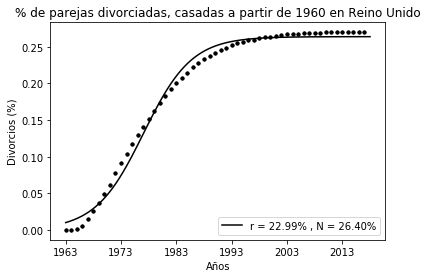

In [247]:
plt.clf()
plt.plot(año_matrimonio1963 , porcentaje_divorcio1963 , 'k.', label='')

taux=np.linspace(0 , 55 , 1000)
fechas = np.arange(0,55,10)

rporciento_1963 = r_1963 *100
kporciento_1963 = k_1963 *100

plt.plot(año_matrimonio1963 , porcentaje_divorcio1963 , 'k.')
plt.plot(taux, fun(taux, r_1963, k_1963), 'k-' , label=f'r = {rporciento_1963:.2f}% , N = {kporciento_1963:.2f}%')

plt.xlabel('Años', fontsize=10)
plt.ylabel('Divorcios (%)', fontsize=10)
plt.xticks(fechas, ['1963','1973','1983','1993','2003','2013'], fontsize=10)
plt.yticks(fontsize=10)
plt.legend(loc='best', fontsize=10)
plt.title('% de parejas divorciadas, casadas a partir de 1960 en Reino Unido')
plt.grid(False)
plt.show()

Como vemos, el porcentaje de matrimonios que se casaron en el año 1963 aumenta hasta estabilizase en un 26 %. En los primeros y en los últimos años casi no hay variación; las parejas tardan un cierto tiempo en divorciarse, pero si superan los 30 años casados no lo suelen hacer en la vejez.
Pese a no tratarse de un sistema logístico convencional, la capacidad de carga y el parámetro de crecimiento nos pueden dar información sobre factores sociales dependientes de la época: la religión, la situación económica de la mujer...

## BIBLIOGRAFÍA
Logistic equation; Weisstein, Eric W; https://mathworld.wolfram.com/LogisticEquation.html

Future population growth; https://ourworldindata.org/future-population-growth

Urbanization; https://ourworldindata.org/urbanization

Marriages and divorces; https://ourworldindata.org/marriages-and-divorces